# Benford law comparision

To compare the capabilities of Azure Anomaly Detecction service, the Benford Law were used as benchmark in some datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\ihfreitas\AppData\Local\Continuum\anaconda3\envs\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


Reading data

In [8]:
df=pd.read_csv("Teste_random.csv",sep=';').drop(["Unnamed: 4",'Unnamed: 5'],axis=1)

In [9]:
df

,data,Esperado,Verificado,Check
0,01/01/1990,49.94,49.94,True
1,02/01/1990,89.09,89.09,True
2,03/01/1990,73.76,73.76,True
3,04/01/1990,22.14,22.14,True
4,05/01/1990,90.00,90.00,True
...,...,...,...,...
10952,27/12/2019,89.58,89.58,True
10953,28/12/2019,56.12,56.12,True
10954,29/12/2019,80.22,80.22,True
10955,30/12/2019,62.85,62.85,True


In [10]:
df["data"]=pd.to_datetime(df["data"])

In [14]:
df.groupby("Check")["Check"].count()

Check
False    2190
True     8767
Name: Check, dtype: int64

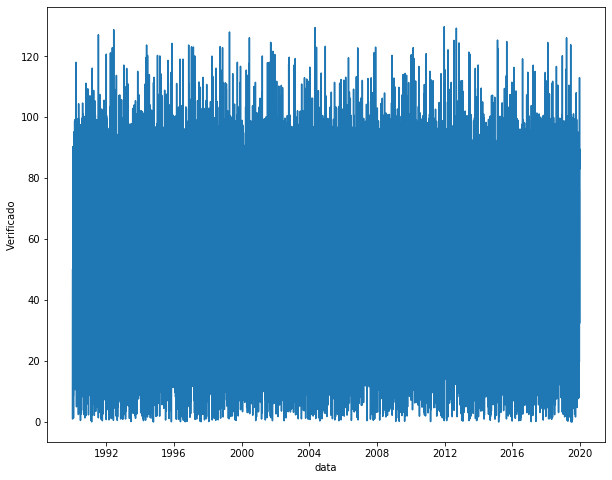

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,8))
sns.lineplot(x="data",y="Verificado",data=df)

Extracting digits

In [20]:
df["VALUES_FIRST_DIGIT"]=df["Verificado"].astype(str)\
                                         .str.replace("0.0","",regex=False)\
                                         .str.replace("0.","",regex=False)\
                                         .str.slice(0,1)

df["VALUES_FIRST_DIGIT_ESPECTED"]=df["Esperado"].astype(str)\
                                         .str.replace("0.0","",regex=False)\
                                         .str.replace("0.","",regex=False)\
                                         .str.slice(0,1)

In [21]:
df

,data,Esperado,Verificado,Check,VALUES_FIRST_DIGIT,VALUES_FIRST_DIGIT_ESPECTED
0,1990-01-01,49.94,49.94,True,4,4
1,1990-02-01,89.09,89.09,True,8,8
2,1990-03-01,73.76,73.76,True,7,7
3,1990-04-01,22.14,22.14,True,2,2
4,1990-05-01,90.00,90.00,True,9,9
...,...,...,...,...,...,...
10952,2019-12-27,89.58,89.58,True,8,8
10953,2019-12-28,56.12,56.12,True,5,5
10954,2019-12-29,80.22,80.22,True,8,8
10955,2019-12-30,62.85,62.85,True,6,6


Apply benford law

In [30]:
benford_law=df.groupby("VALUES_FIRST_DIGIT")["data"].count().reset_index().merge(
    df.groupby("VALUES_FIRST_DIGIT_ESPECTED")["data"].count().reset_index()\
                .rename(columns={"VALUES_FIRST_DIGIT_ESPECTED":"VALUES_FIRST_DIGIT"}),
    on="VALUES_FIRST_DIGIT").rename(columns={"data_x":"verificada","data_y":"esperada"})

In [31]:
benford_law

,VALUES_FIRST_DIGIT,verificada,esperada
0,1,1522,1271
1,2,1161,1230
2,3,1205,1233
3,4,1177,1229
4,5,1166,1170
5,6,1208,1184
6,7,1185,1212
7,8,1176,1216
8,9,1157,1212


In [38]:
benford_law["%_OCORRECIAS_verificada"]=benford_law["verificada"]/benford_law["verificada"].sum()*100
benford_law["%_OCORRECIAS_esperada_dataset"]=benford_law["esperada"]/benford_law["esperada"].sum()*100
benford_law["%_OCORRECIAS_ESPERADAS"]=[30.1,17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6]

In [39]:
benford_law

,VALUES_FIRST_DIGIT,verificada,esperada,%_OCORRECIAS_ESPERADAS,%_OCORRECIAS_verificada,%_OCORRECIAS_esperada_dataset
0,1,1522,1271,30.1,13.890664,11.599890
1,2,1161,1230,17.6,10.595966,11.225700
2,3,1205,1233,12.5,10.997536,11.253080
3,4,1177,1229,9.7,10.741991,11.216574
4,5,1166,1170,7.9,10.641599,10.678105
5,6,1208,1184,6.7,11.024916,10.805878
6,7,1185,1212,5.8,10.815004,11.061422
7,8,1176,1216,5.1,10.732865,11.097928
8,9,1157,1212,4.6,10.559460,11.061422


Verifying results

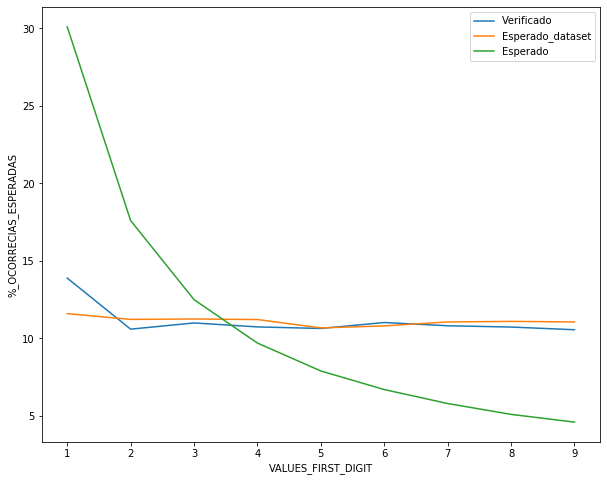

In [40]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,8))
sns.lineplot(x="VALUES_FIRST_DIGIT",y="%_OCORRECIAS_verificada",data=benford_law,label="Verificado")
sns.lineplot(x="VALUES_FIRST_DIGIT",y="%_OCORRECIAS_esperada_dataset",data=benford_law,
             label="Esperado_dataset")
sns.lineplot(x="VALUES_FIRST_DIGIT",y="%_OCORRECIAS_ESPERADAS",data=benford_law,label="Esperado")
plt.legend()

### Conclusion

According benford law, this time serie are almost random, but thinking from the business side this application lack details to guide consultants where to look, since it basically is saying that all the data do not follow benford law and then would be considered as anomalies.

However, since this data were built manually to emulate financial records, the data must not replicate a financial report correctly and then could not be appropriate for this test.